# QUESTION 1

1. Importing necessary libraries

In [1]:
import pandas as pd

Importing dataset

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|', index_col='user_id')

Assigning to variable called users

In [3]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


For mean age per occupation:

In [4]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation from highest to least:

In [5]:
# Defining function to convert gender values to numeric representation
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# Apply the numeric conversion function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# Generate a new DataFrame with the count of males and females for each occupation
gender_occ = users.groupby(['occupation', 'gender_n']).gender.count()

# Generate a new DataFrame with the total count of individuals for each occupation
total_occ = users.groupby('occupation').gender.count()

# For percentage of males for each occupation
male_ratio = gender_occ.loc[:,1] / total_occ * 100

# Sorting male ratio values in descending order
male_ratio.sort_values(ascending=False, inplace=True)
male_ratio


occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

minum and maximum ages for each occupation: 

In [6]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Mean ages for combimations of occuptions and sex:

In [7]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

percentage of women and men per occupation:

In [25]:
# Generate a new DataFrame with the count of males and females for each occupation
gender_occ = users.groupby(['occupation', 'gender']).gender.count()

# Generate a new DataFrame with the total count of males and females
total_gender = users.groupby('gender').gender.count()

# Calculate the percentage distribution of males and females across occupations
occup_gender = gender_occ / total_gender * 100

# Display the percentage distribution of males and females across occupations
occup_gender.unstack().round(2)


gender,F,M
occupation,,
administrator,13.19,6.42
artist,4.76,2.24
doctor,NaN,1.04
educator,9.52,10.30
engineer,0.73,9.70
entertainment,0.73,2.39
executive,1.10,4.33
healthcare,4.03,0.75
homemaker,2.20,0.15


# Question 2

Importing necessary libaries

In [12]:
import pandas as pd

Importing dataset

In [13]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

Assigning to Euro12 variable:

In [14]:
euro12 = pd.read_csv(url)

Selecting goal column

In [15]:
goals = euro12['Goals']

Number of teams that particpated:

In [24]:
number_teams = euro12['Team'].count()
print('Total number of participating teams in Euro2012 is:', number_teams)

Total number of participating teams in Euro2012 is: 16


Number of columns in dataset =

In [20]:
num_columns = euro12.shape[1]
print('Number of columns =', num_columns)

Number of columns = 35


Viewing only columns Team, Yellow Cards and Red Cards and assigning to dataframe 'discipline':

In [21]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

Sort the teams by Red Cards, then Yellow Cards:

In [22]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


Average Yellow Cards Per Team:

In [23]:
avg_yellow_cards = euro12['Yellow Cards'].mean()
print('The average yellow cards per team is:', avg_yellow_cards)

The average yellow cards per team is: 7.4375


teams that scored more than 6 goals:

In [26]:
six_goals = euro12[euro12['Goals'] > 6]
six_goals[['Team', 'Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


teams starting with G:

In [28]:
startG_teams = euro12[euro12['Team'].str.startswith('G')]
startG_teams['Team']

5    Germany
6     Greece
Name: Team, dtype: object

First 7 columns:

In [29]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


All colmumns excluding last 3:

In [30]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Shooting accuracy for England, Italy and Russia:

In [31]:
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

import the necessary libraries

In [86]:
import numpy as np
import pandas as pd

Creating series:

A. The first a random number from 1 to 4

In [88]:
firstno = pd.Series(np.random.randint(1, high=5, size=100))
print (firstno)

0     1
1     2
2     4
3     1
4     2
     ..
95    1
96    3
97    4
98    3
99    2
Length: 100, dtype: int32


B. The second a random number from 1 to 3

In [89]:
secondno = pd.Series(np.random.randint(1, high=4, size=100))
print (secondno)

0     2
1     1
2     2
3     3
4     1
     ..
95    2
96    2
97    1
98    3
99    3
Length: 100, dtype: int32


C. The third a random number from 10,000 to 30,000

In [90]:
thirdno = pd.Series(np.random.randint(10000, high=30001, size=100))
print(thirdno)

0     24792
1     21905
2     25486
3     25983
4     13093
      ...  
95    26606
96    28207
97    19247
98    15251
99    16375
Length: 100, dtype: int32


Create a DataFrame by joinning the Series by column:

In [91]:
DF = pd.DataFrame({'firstno': firstno,'secondno':secondno,'thirdno':thirdno})
DF.head()

,firstno,secondno,thirdno
0,1,2,24792
1,2,1,21905
2,4,2,25486
3,1,3,25983
4,2,1,13093


Change the name of the columns to bedrs, bathrs, price_sqr_meter:

In [93]:
newcol = DF.rename(columns = {'firstno':'bedrs','secondno':'bathrs','thirdno':'price_sqr_meter'})
newcol.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,24792
1,2,1,21905
2,4,2,25486
3,1,3,25983
4,2,1,13093


Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [94]:
df_new = newcol.bedrs.astype(str).str.cat(newcol.bathrs.astype(str)).str.cat(newcol.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     1224792
1     2121905
2     4225486
3     1325983
4     2113093
       ...   
95    1226606
96    3228207
97    4119247
98    3315251
99    2316375
Name: bedrs, Length: 100, dtype: object

Step 6: Yes it ends at 99

Reindex the DataFrame so it goes from 0 to 299

In [95]:
df_new = df_new.reset_index(drop=True)

df_new.reset_index()

df_new.reindex(index=range(0,299))

0      1224792
1      2121905
2      4225486
3      1325983
4      2113093
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

# Question 5

importing libaries

In [32]:
import pandas as pd
import numpy as np

Importing dataset

In [33]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

Assign to Chipo variable:

In [34]:
chipo = pd.read_csv(url, delimiter='\t')

First ten entries:

In [35]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Number of observations in the dataset =

In [37]:
chipo.shape[0]

4622

Number of columns =

In [38]:
chipo.shape[1]

5

Names of all columns:

In [39]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Dataset index:

In [41]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

the most-ordered item:

In [51]:
most_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


Number of items ordered fro Chicken bowl:

In [52]:
most_item.iloc[0]['quantity']

761

most ordered item in the choice_description column:

In [54]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


Total number of ordered items:

In [55]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

Changing the type of item price variable:

In [61]:

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Check the item price type
chipo['item_price'].dtype

dtype('float64')

Revenue for the period=

In [62]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

39237.02

Number of orders were made in the period =

In [64]:
Total_orders = chipo['order_id'].nunique()
Total_orders

1834

In [66]:
# first total revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

# for average revenue
num_orders = chipo['order_id'].nunique()
avg_revenue_per_order = total_revenue / num_orders

print('The Average revenue amount per order is $', round(avg_revenue_per_order, 2))

The Average revenue amount per order is $ 21.39


# Question 6

line plot of the number of marriages and divorces per capita in theU.S. between 1867 and 2014.

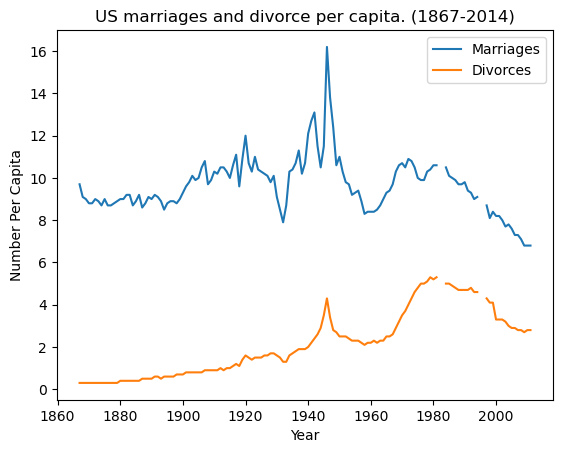

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# create a line plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

# set the labels and legend
plt.xlabel('Year')
plt.ylabel('Number Per Capita')
plt.title('US marriages and divorce per capita. (1867-2014)')
plt.legend()

# show the plot
plt.show()

# Question 7

bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

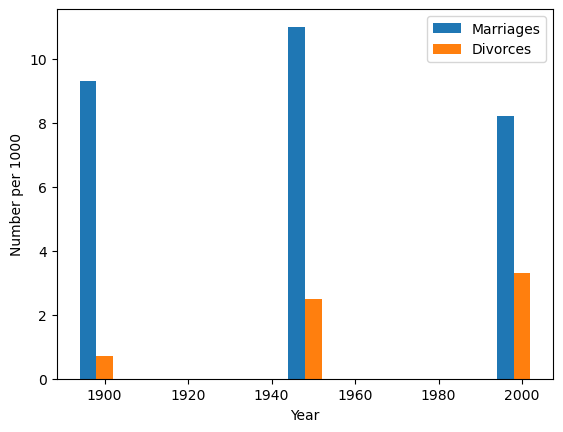

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the data from CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


#  Creating a  bar chart
subset = data[data['Year'].isin([1900, 1950, 2000])]
plt.bar(subset['Year']-4, subset['Marriages_per_1000'], width=4, label='Marriages')
plt.bar(subset['Year'], subset['Divorces_per_1000'], width=4, label='Divorces')

#Adding axis labels and legend
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.legend()

#Show the plot
plt.show()

# Question 8

horizontal bar chart that compares the deadliest actors in Hollywood

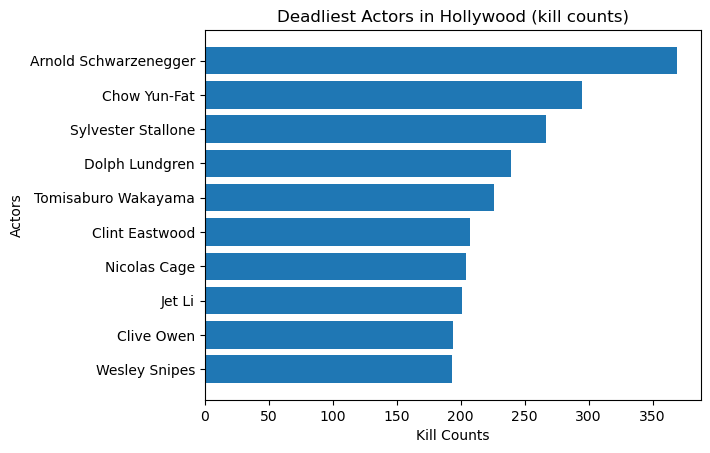

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
data = pd.read_csv('actor_kill_counts.csv')

# Sorting bykillcounts
data = data.sort_values('Count')

# Create a horizontal bar chart
plt.barh(data['Actor'], data['Count'])

# Add labels and title
plt.xlabel('Kill Counts')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood (kill counts)')

# Show the plot
plt.show()

# Question 9

pie chart showing the fraction of Roman Emperors that were assassinated

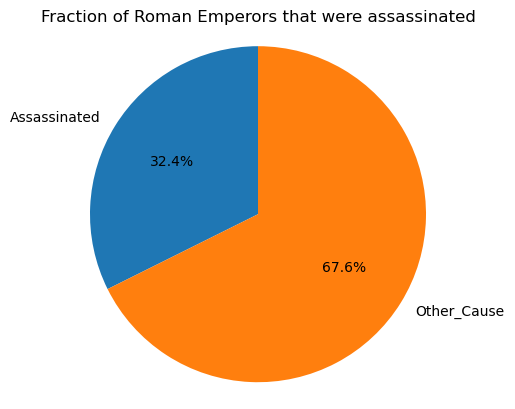

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data 
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors that were assassinated
assassinated = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of emperors that died of other causes
other = data[data['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Creating the pie chart
labels = ['Assassinated', 'Other_Cause']
sizes = [assassinated, other]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Fraction of Roman Emperors that were assassinated')

# Show the chart
plt.show()

# Question 10

scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

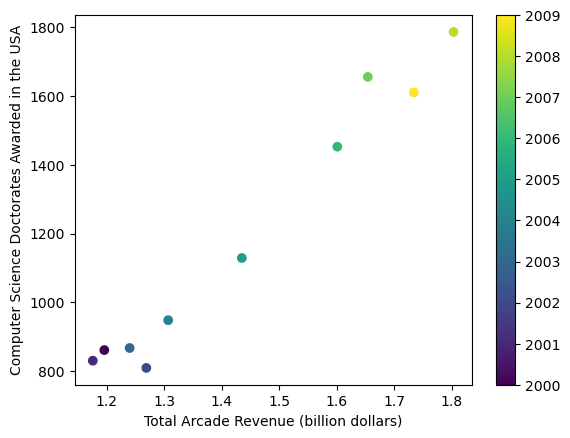

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data 
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Creating the scatter plot
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

# Adding labels and colourbar
plt.xlabel("Total Arcade Revenue (billion dollars)")
plt.ylabel("Computer Science Doctorates Awarded in the USA")
plt.colorbar()

# show plot
plt.show()